# Walmart Business Case

## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import norm, binom, poisson, stats

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv("Wallmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [101]:
df.shape

(550068, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
#conversion of categorical attributes to 'category

category=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[category]=df[category].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [16]:
#Checking missing values:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no null values in dataset

In [11]:
#Checking the characteristics of the data:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [12]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Initial Observations**

- There are no missing values
- There are 5891 unique users, and userid **1001680.0** being with the highest count.
- There are 3631 unique product IDs in the dataset. **P00265242** is the most sold Product ID.
- There are 7 unique age groups and most of the purchase belongs to age 26-35 group.
- The customers belongs to 21 distinct occupation for the purchases being made with Occupation 4 being the highest.
- There are 3 unique city_categories with category B being the highest.
- The range of purchasing behavior is quite extensive, as evidenced by a minimum purchase of 12 and a maximum of 23,961. The mean purchase amount stands at 9,264, and 75% of purchases are at or below 12,054, indicating that the majority of purchases fall below the 12,000 threshold.
- 5 unique values for Stay_in_current_citi_years with 1 being the highest.
- Marital status unmarried contribute more in terms of the count for the purchase.
- There are 20 unique product categories with 5 being the highest.
- Among the 550,068 data points, 414,259 are categorized as Male, while the remaining individuals are classified as Female. It's evident that the count of purchases attributed to the Male category significantly outweighs that of the Female category, indicating a higher volume of purchases made by males.

## Non-Graphical Analysis: Value counts and unique attributes ​

In [31]:
cate_col = ['Gender', 'Age', 'City_Category','Marital_Status', 'Stay_In_Current_City_Years']
result = df[cate_col].melt().groupby(['variable', 'value'])[['value']].count()/len(df)
result = result.rename(columns={'value': 'value_percent'})
result['value_percent'] = result['value_percent'] * 100
result

value_percent
variable                   value               
Age                        0-17        2.745479
                           18-25      18.117760
                           26-35      39.919974
                           36-45      19.999891
                           46-50       8.308246
                           51-55       6.999316
                           55+         3.909335
City_Category              A          26.854862
                           B          42.026259
                           C          31.118880
Gender                     F          24.689493
                           M          75.310507
Marital_Status             0          59.034701
                           1          40.965299
Stay_In_Current_City_Years 0          13.525237
                           1          35.235825
                           2          18.513711
                           3          17.322404
                           4+         15.402823

- 40% of the purchase done by aged 26-35. 
- maximum percent of purchase done by city_category B.
- 75% of the purchase count are done by Male and 25% by Female.
- 60% single, 40% married contributes to purchase count. 
- 35% people staying from a year and 15% living for more than 4 years in current city.

In [43]:
#highest count of purchase by users
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [42]:
#highest amount by users
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

In [54]:
unique_userid = df.groupby(['Occupation'])[['Purchase']].sum()
unique_userid['percent'] = (unique_userid['Purchase'] / unique_userid['Purchase'].sum()) * 100
unique_userid

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


- Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.

In [57]:
unique_product_cate = df.groupby(['Product_Category'])[['Purchase']].sum()
unique_product_cate['percent'] = (unique_product_cate['Purchase'] / unique_product_cate['Purchase'].sum()) * 100
unique_product_cate

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


- Categories such as 1, 5, and 8 have made a more significant contribution to the overall purchase amount.

In [58]:
unique_city_cate = df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum()
unique_city_cate['percent'] = (unique_city_cate['Purchase'] / unique_city_cate['Purchase'].sum()) * 100
unique_city_cate

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


- people who lived 1 year has more purchased value

### Visual Analysis - Univariate 

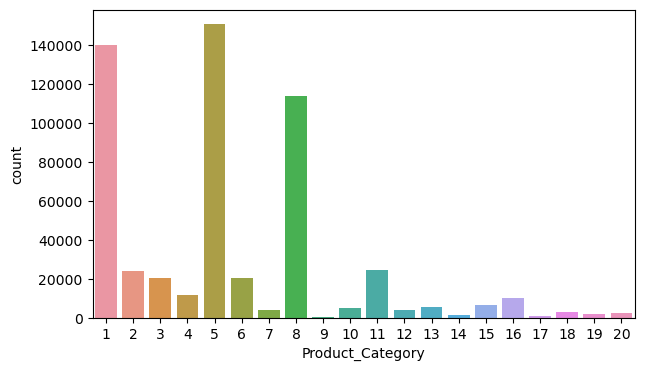

In [81]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product_Category')
plt.show()

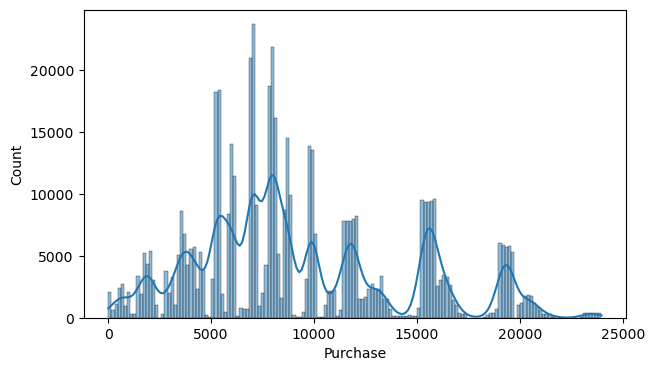

In [63]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

It's evident that there is a higher count of purchase values falling within the range of 5000 to 10000. Additionally, there are noticeable outliers present in the dataset.

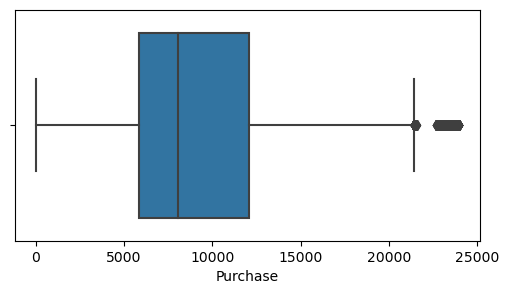

In [84]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Purchase')
plt.show()

- Median purchase is about.
- Interquartile range is 6000 to 12000
- There are outliers we can see

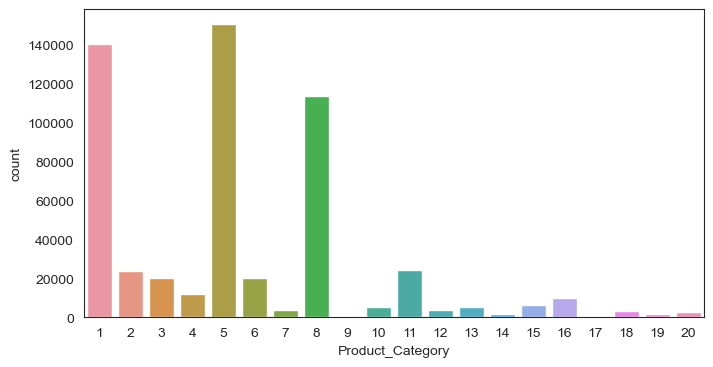

In [98]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Product_Category')
plt.show()

Product_categories 4, 0, and 7 exhibit higher counts, while category 9 and 17  records the lowest number of purchases

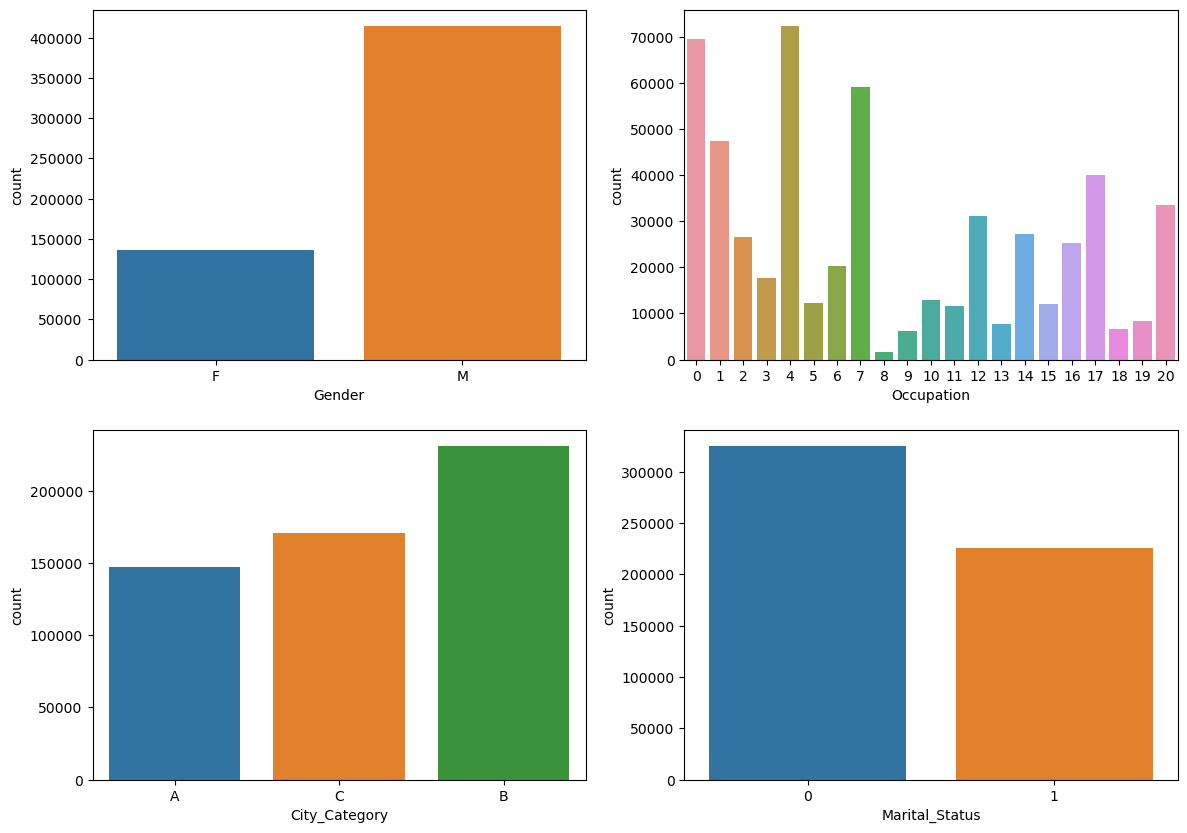

In [77]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.countplot(data=df, x='Gender', ax=axis[0,0])
sns.countplot(data=df, x='Occupation', ax=axis[0,1])
sns.countplot(data=df, x='City_Category', ax=axis[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axis[1,1])
plt.show()

- The graphical representation above illustrates that males have made significantly more purchases than females.
- Occupation categories 4, 0, and 7 exhibit notably higher purchase volumes, while 8 records the lowest number of purchases.
- The City category marked as 'B' stands out as the top contributor to purchase numbers, showcasing the highest levels of sales.
- Customers categorized as single display a higher frequency of purchases compared to married.

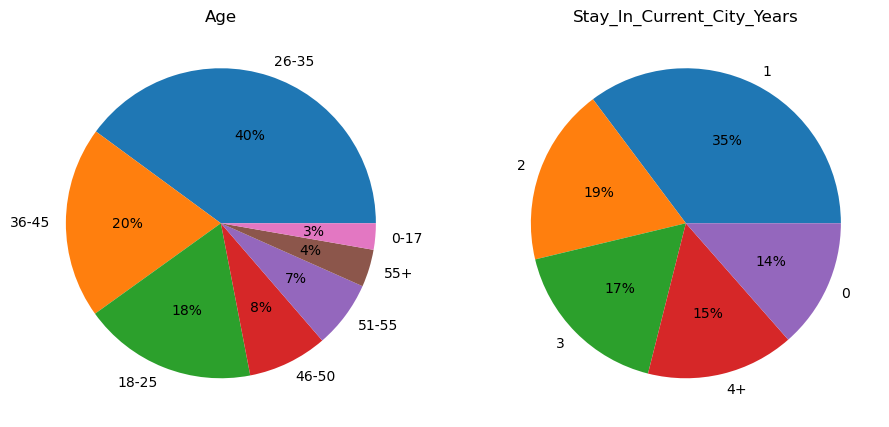

In [9]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(11,7))
data1 = df['Age'].value_counts(normalize=True) * 100
axs[0].pie(x=data1.values, labels=data1.index, autopct='%1.0f%%')
axs[0].set_title('Age')

data2 = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
axs[1].pie(x=data2.values, labels=data2.index, autopct='%1.0f%%')
axs[1].set_title('Stay_In_Current_City_Years')

plt.show()

1. Among the user age groups, 40% fall within the 26–35 age bracket, while 20% are aged 36–45. Additionally, 18% belong to the 18–25 age group, 8% fall in the 46–50 category, 7% are aged 51–55, and 4% are aged 55 and older. The age group with the lowest representation comprises users aged 0–17, accounting for just 2% of the total.

2. When it comes to the duration of staying in a city, 35% of users stay for a year, while 19% opt for a 2-year stay. Furthermore, 17% choose to reside in a city for 3 years, and 15% commit to a city for a period exceeding 4 years.

### Bivariate analysis

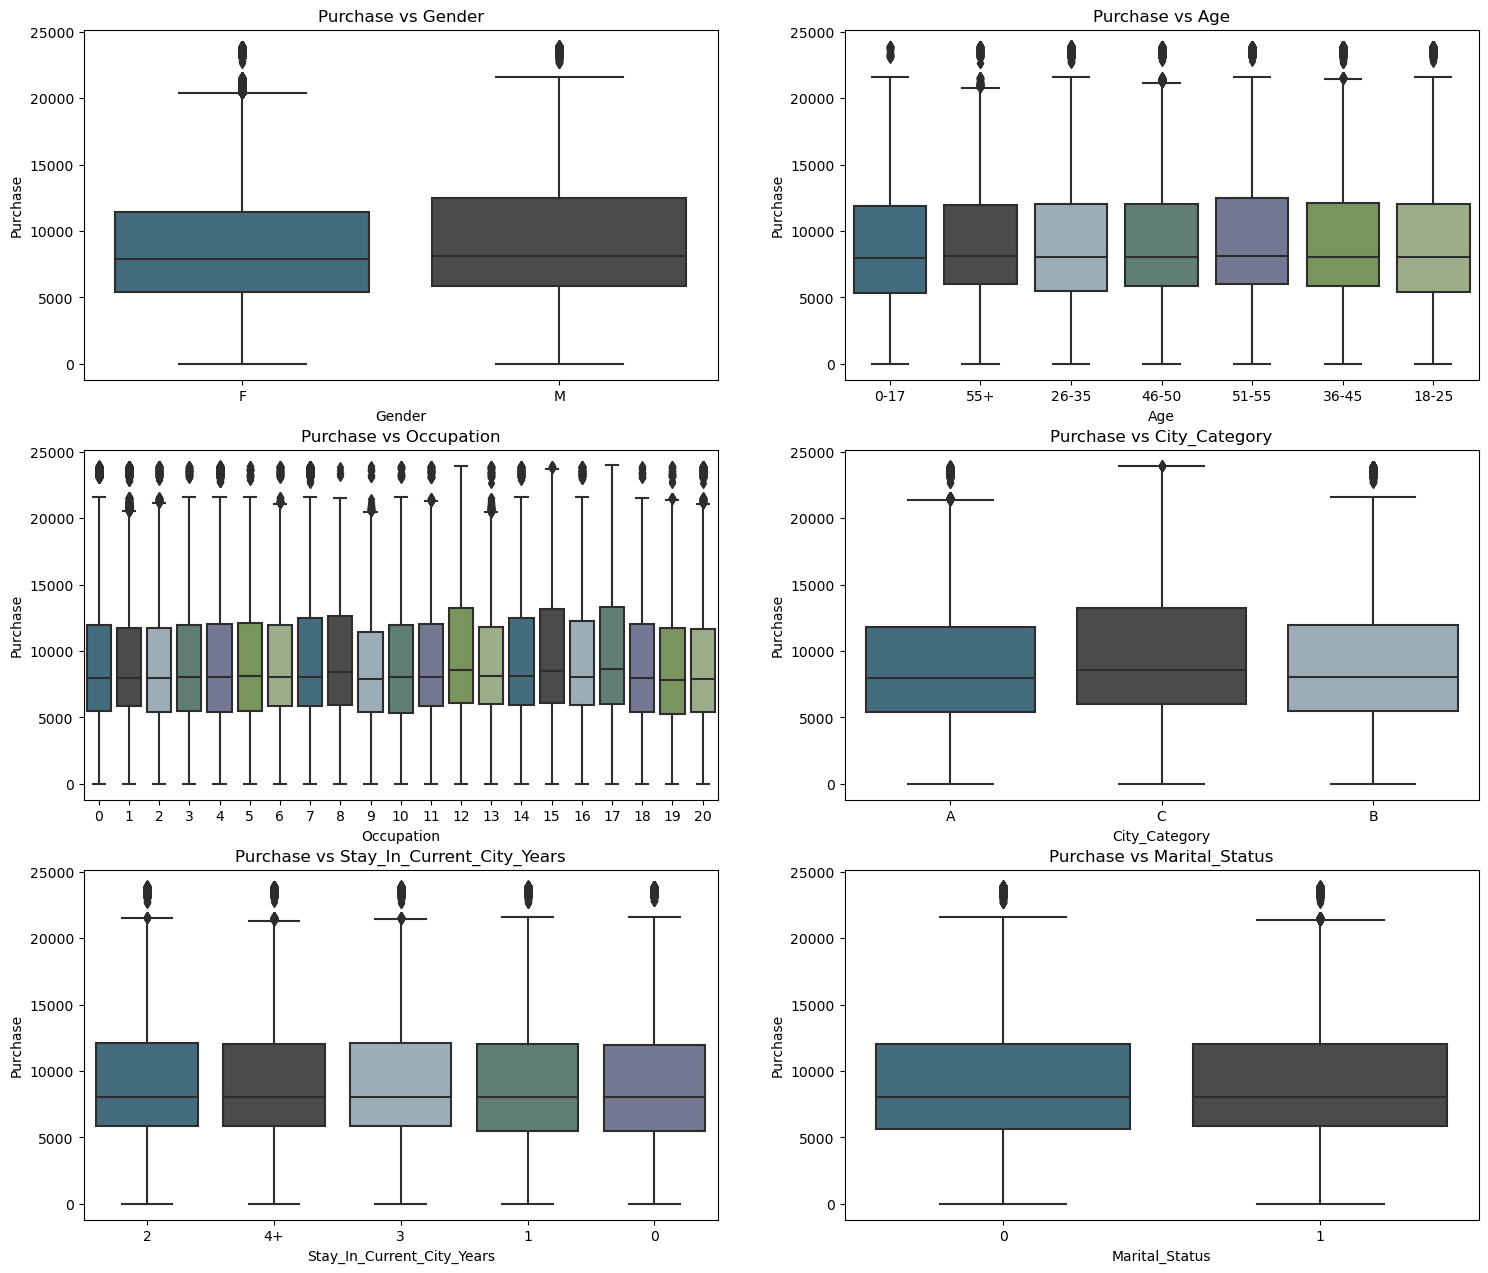

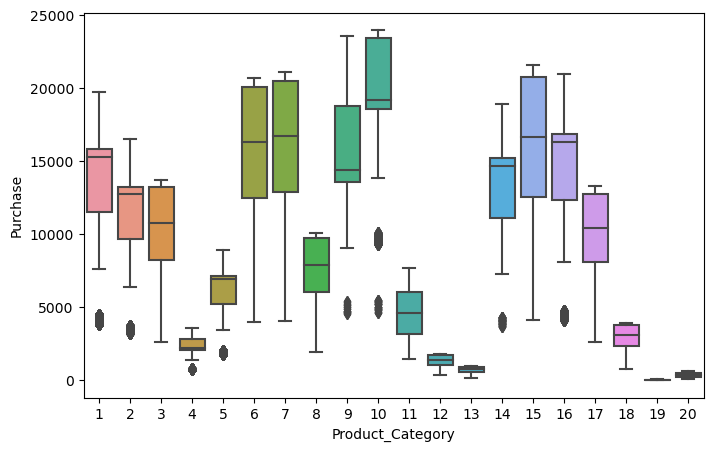

In [32]:
column = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=column[count], palette=color_map, ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {column[count]}")
        count += 1
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Purchase', x='Product_Category')
plt.show()

1. The spending patterns between males and females exhibit a remarkable similarity, as from the histogram plot above. Males tend to have slightly higher purchase values than females, but the overall behavior aligns closely.

2. Across various age categories, a consistent purchasing pattern emerges. In all age groups, the majority of purchases fall within the 5,000 to 12,000 range, with occasional outliers.

3. Median purchase amount of city of category C is slightly higher than other city categories.

4. Similarly, for factors such as City category, duration of stay in the current city, and marital status, users predominantly spend within the 5,000 to 12,000 range.

5. Product categories exhibit noteworthy variations. Category 10 products stand out as the most expensive. Additionally, certain product categories show outliers in terms of their pricing.

**For correlation: Heatmaps**

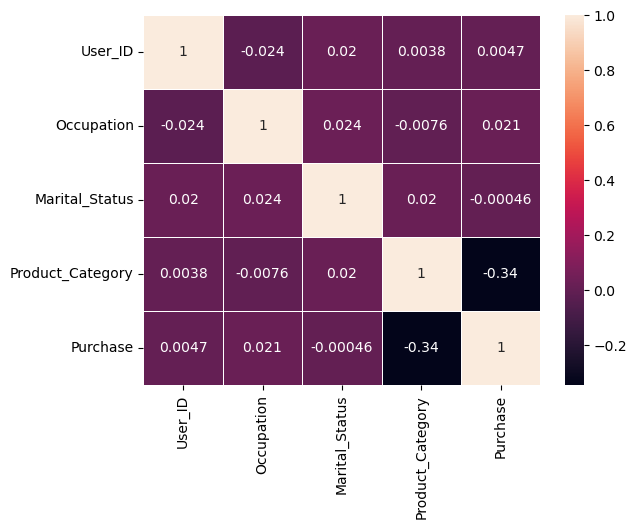

In [30]:
sns.heatmap(df.corr(), annot=True, linewidth=.5)
plt.show()

### Missing Value & Outlier Detection 

In [34]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

there is no null value

**Outlier detection**

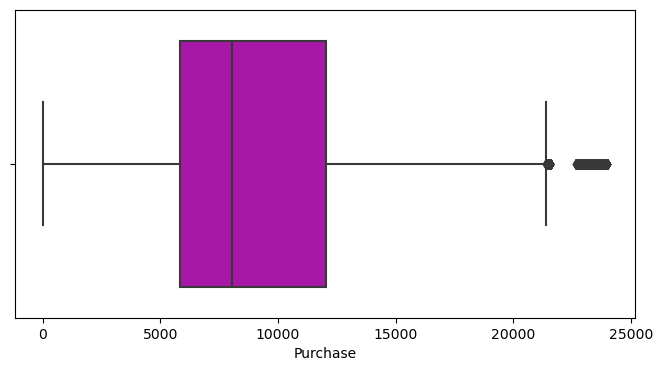

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Purchase"],color='m')
plt.show()

In [74]:
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
IQR = q3 - q1
outliers = df['Purchase'][(df['Purchase'] < (q1 - 1.5 * IQR)) | (df['Purchase'] > (q3 + 1.5 * IQR))]

print("No. of outliers: " + str(len(outliers)))
print("Max outlier: " + str(outliers.max()))
print("Min outlier: " + str(outliers.min()))

No. of outliers: 2677
Max outlier: 23961
Min outlier: 21401


## 1.  Are women spending more money per transaction than men? Why or Why not?

### Average amount spend per males and females

In [52]:
avg_gender = df.groupby(['User_ID','Gender'])[['Purchase']].sum()
avg_gender = avg_gender.reset_index()
avg_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [78]:
avg_gender['Gender'].value_counts(normalize=True)*100

M    71.719572
F    28.280428
Name: Gender, dtype: float64

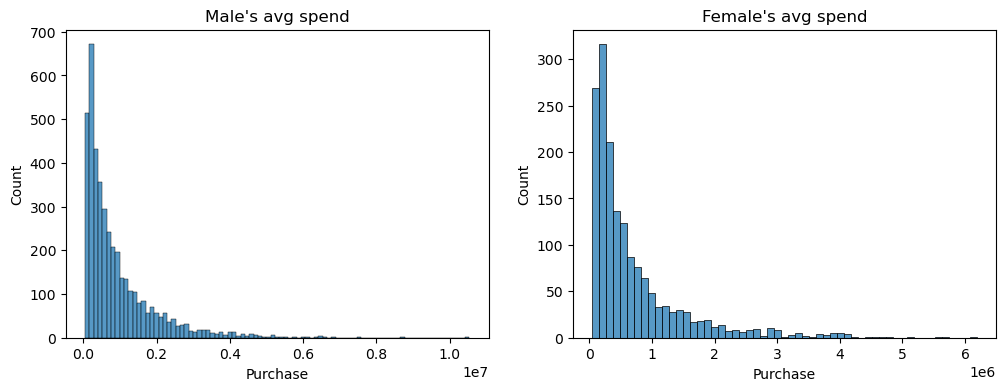

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(data=avg_gender[avg_gender['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male's avg spend")
sns.histplot(data=avg_gender[avg_gender['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female's avg spend")
plt.show()

<Figure size 2500x1000 with 0 Axes>

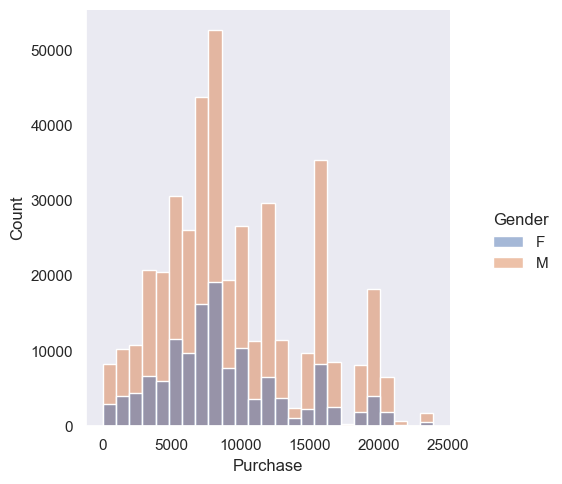

In [79]:
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df, hue='Gender',bins=25)
plt.show()

In [75]:
avg_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [76]:
avg_gender.groupby(['Gender'])[['Purchase']].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


**Insights:-**

- Average amount spend by males are higher than females.
- The mean spending for **males** across the entire population stands at **925,344**, a figure significantly lower for **females**, who average **712,024** in spending. 
- Based on the data, men tend to outspend women. Approximately 72% of the total contributions come from men, with women accounting for only 28% of the purchases.

**The lower purchase behavior by women compared to men can be influenced by various factors**
- Women, on average, may have lower incomes than men
- Due to different preferences for products, brands, or shopping experiences, which can affect their spending.
- Unequal access to credit and financial services can limit women's ability to make purchases, especially for larger or more expensive items.
- Social and cultural norms may influence gender-specific spending behaviors.

## 2. Confidence intervals and distribution of the mean of the expenses by female and male customers

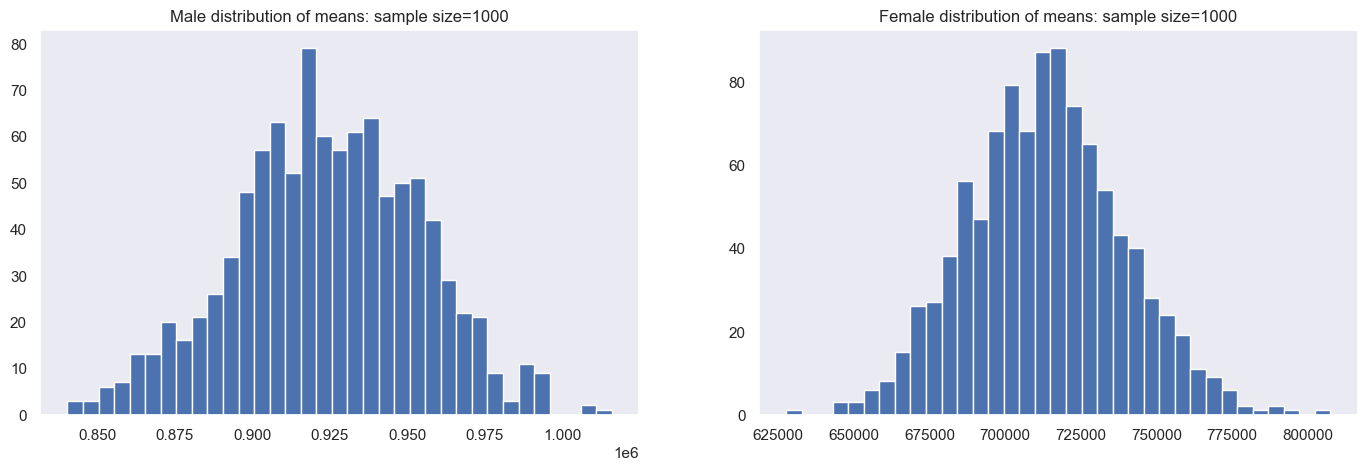

In [157]:
#gender wise distribution
df_male=avg_gender[avg_gender['Gender']=='M']
df_female=avg_gender[avg_gender['Gender']=='F']

Gender=['M', 'F']
sample_size=1000
num_repitition =1000

male_means=[]
female_means=[]

for i in range (num_repitition):
    male_mean=df_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean=df_female.sample(sample_size, replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)
    
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(17,5))
axs[0].hist(male_means,  bins=35)
axs[0].set_title('Male distribution of means: sample size=1000')
axs[1].hist(female_means,  bins=35)
axs[1].set_title('Female distribution of means: sample size=1000')
plt.show()

In [172]:
#Taking the value for z at 90% confidence interval as:
z90=1.645 #90% Confidence Interval

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male = sample_std_male/np.sqrt(1000)
sample_std_error_female = sample_std_female/np.sqrt(1000)

upper_limit_male = z90*sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - z90*sample_std_error_male 

upper_limit_female = z90*sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - z90*sample_std_error_female

print('Population avg spend amount for Male: {:.2f}'.format(df_male['Purchase'].mean()))
print('Population avg spend amount for Female: {:.2f}'.format(df_female['Purchase'].mean()))

print('\nMale- Sample mean: {:.2f}'.format(sample_mean_male))
print('Female- Sample mean: {:.2f}'.format(np.mean(female_means)))

print('\nSample std for Male: {:.2f}'.format(pd.Series(male_means).std()))
print('Sample std for Female: {:.2f}'.format(pd.Series(female_means).std()))

print('\nSample std error for Male: {:.2f}'.format(pd.Series(male_means).std()/np.sqrt(1000)))
print('Sample std error for Female: {:.2f}'.format(pd.Series(female_means).std()/np.sqrt(1000)))

print('\nMale at 90% CI: ',[lower_limit_male, upper_limit_male])
print('Female at 90% CI: ',[lower_limit_female, upper_limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Male- Sample mean: 924147.93
Female- Sample mean: 713200.14

Sample std for Male: 30096.01
Sample std for Female: 25638.01

Sample std error for Male: 951.72
Sample std error for Female: 810.75

Male at 90% CI:  [922582.3485739834, 925713.5054840166]
Female at 90% CI:  [711866.4644845712, 714533.8161774289]


**Now using the Central Limit Theorem for the population we can say that:**
- Average amount spend by male customers is **925344.40**
- Average amount spend by female customers is **712024.39**

**by using the Confidence interval at 90%, we can say that:**
- Average amount spend by male customers lie in the range **922582.34 - 925713.50**

- Average amount spend by female customers lie in range **711866.46 - 714533.81**

By increasing the sample size we can see confidence interval is more closer to the population mean.

In [171]:
#Taking the value for z at 95% confidence interval as:
z95=1.960 #95% Confidence Interval
upper_limit_male = z95*sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - z95*sample_std_error_male 

upper_limit_female = z95*sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - z95*sample_std_error_female

print('\nMale at 95% CI: ',[lower_limit_male, upper_limit_male])
print('Female at 95% CI: ',[lower_limit_female, upper_limit_female])


Male at 95% CI:  [922282.5569549376, 926013.2971030624]
Female at 95% CI:  [711611.079748021, 714789.2009139792]


In [168]:
#Taking the value for z at 99% confidence interval as:
z99=2.576 #99% Confidence Interval
upper_limit_male = 2.576 *sample_std_error_male + sample_mean_male
lower_limit_male = sample_mean_male - 2.576 *sample_std_error_male 

upper_limit_female = 2.576 *sample_std_error_female + sample_mean_female
lower_limit_female = sample_mean_female - 2.576 *sample_std_error_female

print('\nMale at 99% CI: ',[lower_limit_male, upper_limit_male])
print('Female at 99% CI: ',[lower_limit_female, upper_limit_female])


Male at 99% CI:  [921696.2977888038, 926599.5562691962]
Female at 99% CI:  [711111.6607076562, 715288.619954344]


-  on average, male customers have higher mean expenses than female customers.
- To gain deeper insights, Walmart may conduct market research to understand the specific needs, preferences, and motivations of their male and female customer segments.

## 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [197]:
male_margin_error = 1.96*df_male['Purchase'].std()/np.sqrt(len(df_male))
male_sample_mean = df_male['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_error
male_upper_lim = male_sample_mean + male_margin_error
female_margin_error = 1.96*df_female['Purchase'].std()/np.sqrt(len(df_female))
female_sample_mean = df_female['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_error
female_upper_lim = female_sample_mean + female_margin_error
print('\nMale at 95% CI: ',[male_lower_lim, male_upper_lim])
print('Female at 95% CI: ',[female_lower_lim, female_upper_lim])


Male at 95% CI:  [895617.8331736492, 955070.9715600787]
Female at 95% CI:  [673254.7725364959, 750794.0173794704]


**Insights**

**We can now make conclusions about the population with 95% confidence:**

- No, Confidence intervals of average male and female spending are not overlapping.
- The average spending by male customers is expected to fall within the range of **(895,617.83, 955,070.97)** in 95% of cases.
- Similarly, the average spending by female customers is likely to range from **(673,254.77, 750,794.02)** in 95% of instances.

**Trend can be change by**
- Develop gender-specific marketing strategies and campaigns. 
- Adjust the product assortment to better align with the preferences of each gender.
- Utilize customer data and preferences to personalize the shopping experience.
- Optimize pricing strategies based on gender-specific insights.
- Actively seek feedback from customers to understand their needs and preferences.

## 4. Results when the same activity is performed for Married vs Unmarried

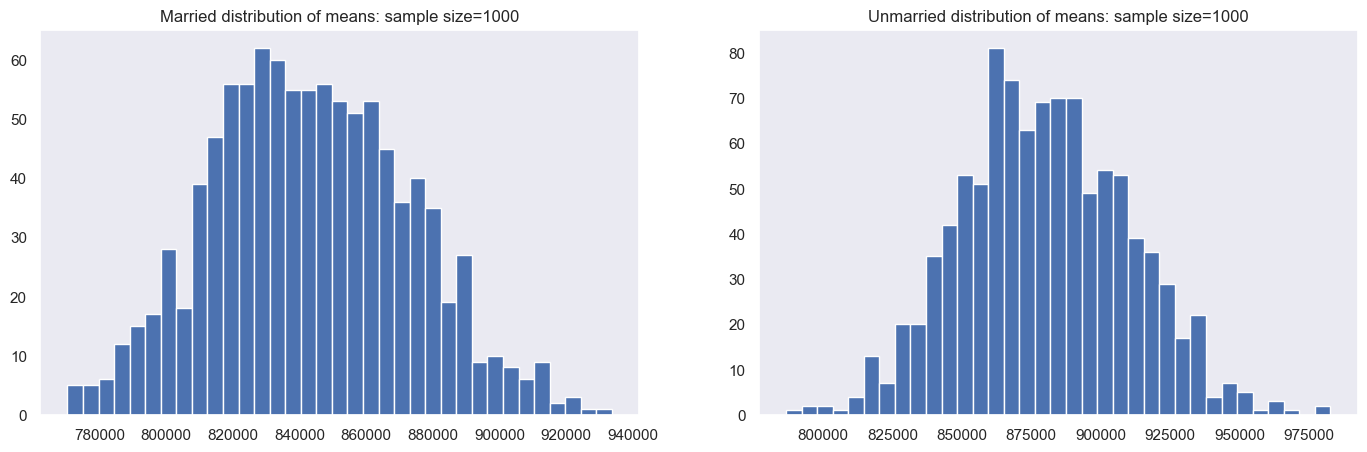

In [224]:
avg_marital = df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum()
avg_marital = avg_marital.reset_index()

#Marital wise distribution
df_married=avg_marital[avg_marital['Marital_Status']==1]
df_unmarried=avg_marital[avg_marital['Marital_Status']==0]

sample_size=1000
num_repitition =1000

married_means=[]
unmarried_means=[]

for i in range (num_repitition):
    married_mean = df_married.sample(sample_size, replace=True)['Purchase'].mean()
    unmarried_mean = df_unmarried.sample(sample_size, replace=True)['Purchase'].mean()
    
    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)
    
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(17,5))
axs[0].hist(married_means,  bins=35)
axs[0].set_title('Married distribution of means: sample size=1000')
axs[1].hist(unmarried_means,  bins=35)
axs[1].set_title('Unmarried distribution of means: sample size=1000')
plt.show()

In [213]:
avg_marital['Marital_Status'].value_counts(normalize=True)*100

0    58.003735
1    41.996265
Name: Marital_Status, dtype: float64

**Calculating 90% confidence interval for avg expenses for married/Unmarried for sample size 1000:**

In [225]:
#Taking the value for z at 90% confidence interval as:
z90=1.645 #90% Confidence Interval

sample_married_mean = np.mean(married_means)
sample_unmarried_mean = np.mean(unmarried_means)

sample_std_married = pd.Series(married_means).std()
sample_std_unmarried = pd.Series(unmarried_means).std()

sample_std_error_married = sample_std_married/np.sqrt(1000)
sample_std_error_unmarried = sample_std_unmarried/np.sqrt(1000)

upper_limit_married = z90*sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z90*sample_std_error_married 

upper_limit_unmarried = z90*sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z90*sample_std_error_female

print('Population avg spend amount for Married: {:.2f}'.format(df_married['Purchase'].mean()))
print('Population avg spend amount for Unmarried: {:.2f}'.format(df_unmarried['Purchase'].mean()))

print('\nMarried- Sample mean: {:.2f}'.format(sample_married_mean))
print('Unmarried- Sample mean: {:.2f}'.format(sample_unmarried_mean))

print('\nSample std for Married: {:.2f}'.format(sample_std_married))
print('Sample std for Unmarried: {:.2f}'.format(sample_std_unmarried))

print('\nSample std error for Married: {:.2f}'.format(sample_std_error_married))
print('Sample std error for Unnmarried: {:.2f}'.format(sample_std_error_unmarried))

print('\nMarried at 90% CI: ',[lower_limit_married, upper_limit_married])
print('Unmarried at 90% CI: ',[lower_limit_unmarried, upper_limit_unmarried])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Unmarried: 880575.78

Married- Sample mean: 843263.62
Unmarried- Sample mean: 879854.38

Sample std for Married: 29480.55
Sample std for Unmarried: 30142.15

Sample std error for Married: 932.26
Sample std error for Unnmarried: 953.18

Married at 90% CI:  [841730.0555285588, 844797.1804414412]
Unmarried at 90% CI:  [878937.4600324642, 881422.3545629216]


**Now using the Central Limit Theorem for the population we can say that:**
- Average amount spend by married customers is **843526.80**
- Average amount spend by unmarried customers is **880575.78**

**by using the Confidence interval at 90%, we can say that:**
- Average amount spend by married customers lie in the range **841730.05, 844797.18**

- Average amount spend by unmarried customers lie in range **878937.46, 881422.35**

**Calculating 95% confidence interval for avg expenses for married/Unmarried for sample size 1000:**

In [227]:
#Taking the value for z at 95% confidence interval as:
z95=1.960 #95% Confidence Interval
upper_limit_married = z95*sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z95*sample_std_error_married 

upper_limit_unmarried = z95*sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z95*sample_std_error_female

print('\nMarried at 95% CI: ',[lower_limit_married, upper_limit_married])
print('Unmarried at 95% CI: ',[lower_limit_unmarried, upper_limit_unmarried])


Married at 95% CI:  [841436.3946326446, 845090.8413373554]
Unmarried at 95% CI:  [878761.880430617, 881722.6058286087]


**Calculating 99% confidence interval for avg expenses for married/Unmarried for sample size 1000:**

In [228]:
#Taking the value for z at 99% confidence interval as:
z99=2.576 #99% Confidence Interval
upper_limit_married = z99*sample_std_error_married + sample_married_mean
lower_limit_married = sample_married_mean - z99*sample_std_error_married 

upper_limit_unmarried = z99*sample_std_error_unmarried + sample_unmarried_mean
lower_limit_unmarried = sample_unmarried_mean - z99*sample_std_error_female

print('\nMarried at 99% CI: ',[lower_limit_married, upper_limit_married])
print('Unmarried at 99% CI: ',[lower_limit_unmarried, upper_limit_unmarried])


Married at 99% CI:  [840862.12443619, 845665.11153381]
Unmarried at 99% CI:  [878418.5247647824, 882309.7638592857]


**Insights**

- the distribution of mean expenses for unmarried customers is consistently higher and shifted to the right compared to married customers, this suggests that, on average, unmarried customers tend to spend more.
- Walmart can tailor marketing strategies and product offerings to further engage and attract unmarried customers who tend to spend more. For married customers, there may be opportunities to improve marketing efforts or offer products that align with their preferences.
- Walmart can consider offering targeted promotions, loyalty programs, or incentives that are specifically designed to appeal to unmarried customers, potentially further increasing their spending.
- Segmenting customers by marital status and spending behavior can help Walmart provide a more personalized shopping experience. This could involve recommending products or offers based on historical spending patterns.

## 5. Results when the same activity is performed for Age

In [230]:
avg_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_age = avg_age.reset_index()
avg_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

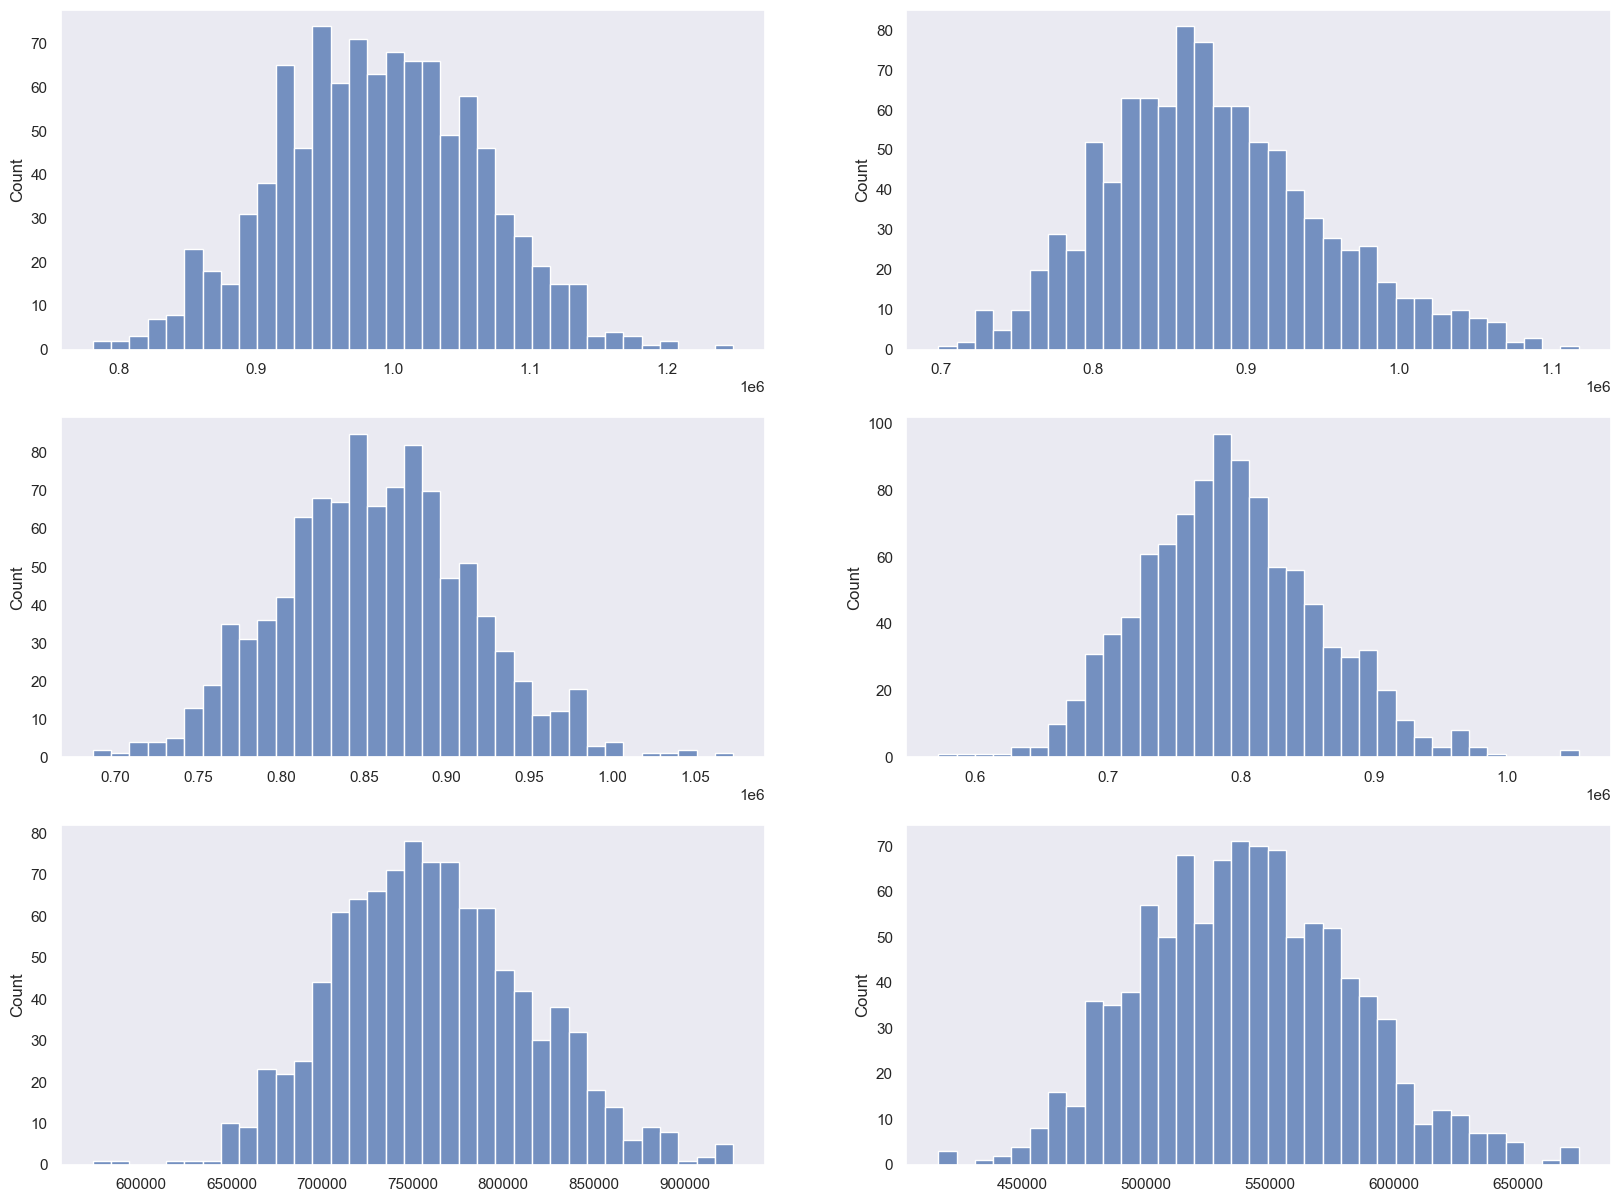

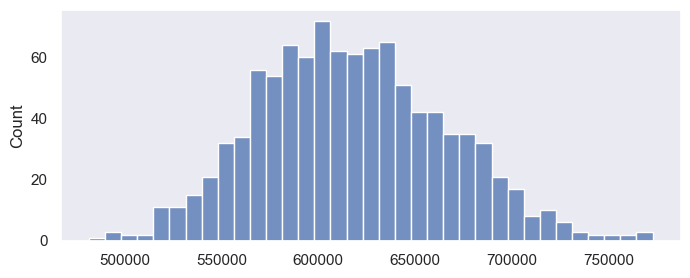

In [237]:
samp_size=200
num_repitition =1000

age_means={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    age_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitition):
        mean = avg_age[avg_age['Age']==i].sample(samp_size, replace=True)['Purchase'].mean()
        age_means[i].append(mean)
        
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(age_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(age_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(age_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(age_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(age_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(age_means['55+'],bins=35,ax=axis[2,1])

plt.figure(figsize=(8, 3))
sns.histplot(age_means['0-17'],bins=35)
plt.show()    

In [276]:
population_means = {}
for i in age_intervals:
    population_means[i] = []
    population_m = avg_age[avg_age['Age']==i]['Purchase'].mean()
    population_means[i].append(population_m)
    print("Population mean for age group '{}': {:.2f}".format(i, population_m))


Population mean for age group '26-35': 989659.32
Population mean for age group '36-45': 879665.71
Population mean for age group '18-25': 854863.12
Population mean for age group '46-50': 792548.78
Population mean for age group '51-55': 763200.92
Population mean for age group '55+': 539697.24
Population mean for age group '0-17': 618867.81


**Calculating the 90% confidence intervals for the average expenses within various age groups, considering a sample size of 200:**

In [261]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]
        
    std_error = z90*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 90% CI of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 90% CI of means: (952206.28, 1027112.35)
For age 36-45 90% CI of means: (832398.89, 926932.53)
For age 18-25 90% CI of means: (810187.65, 899538.59)
For age 46-50 90% CI of means: (726209.00, 858888.57)
For age 51-55 90% CI of means: (703772.36, 822629.48)
For age 55+ 90% CI of means: (487032.92, 592361.57)
For age 0-17 90% CI of means: (542320.46, 695415.16)


**Calculating the 95% confidence intervals for the average expenses within various age groups, considering a sample size of 200:**

In [262]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]
        
    std_error = z95*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 95% CI of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 95% CI of means: (945034.42, 1034284.21)
For age 36-45 95% CI of means: (823347.80, 935983.62)
For age 18-25 95% CI of means: (801632.78, 908093.46)
For age 46-50 95% CI of means: (713505.63, 871591.93)
For age 51-55 95% CI of means: (692392.43, 834009.42)
For age 55+ 95% CI of means: (476948.26, 602446.23)
For age 0-17 95% CI of means: (527662.46, 710073.17)


**Calculating the 99% confidence intervals for the average expenses within various age groups, considering a sample size of 200:**

In [263]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    df_age = avg_age[avg_age['Age'] == val]
        
    std_error = z99*df_age['Purchase'].std()/np.sqrt(len(df_age))
    sample_mean = df_age['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error
    print("For age {} 99% CI of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 99% CI of means: (931009.46, 1048309.18)
For age 36-45 99% CI of means: (805647.89, 953683.53)
For age 18-25 99% CI of means: (784903.24, 924823.00)
For age 46-50 99% CI of means: (688663.50, 896434.06)
For age 51-55 99% CI of means: (670138.33, 856263.52)
For age 55+ 99% CI of means: (457227.15, 622167.34)
For age 0-17 99% CI of means: (498997.92, 738737.71)


**Insights**

-   It's clear that the **26-35** age group tends to spend the most, indicating a prime demographic for high-value products and premium offerings.
- On the other hand, the **55+** age group spends the least on average, suggesting the need for more budget-friendly options.
- The **26-35** and **36-45** age groups, with higher spending averages, may be more valuable to the business in the long term.
- The **18-25** age group, despite being younger, shows significant spending. This may present an opportunity for Wallmart to capture the loyalty of younger consumers early, potentially creating long-term customers.
- marketing efforts aimed at the **26-35** age group might focus on aspirational and high-value products, while those for the **55+** group might emphasize cost-effectiveness and convenience.
- premium and luxury products may be tailored to the tastes of the **26-35** age group.
- Monitoring changes in population means can help forecast trends.

# Final Insights

1. Considering the gender distribution within the population, it is evident that males tend to outspend females. Additionally, marital status significantly influences their buying patterns.
2. Based on the data, unmarried consumers emerge as the primary spenders. Furthermore, the data implies that unmarried males and married females exhibit higher purchase behavior compared to their respective counterparts.
3. The popularity of Product Category 5 among females and the preference for Product Category 1 among men provide an opportunity for effective customer segmentation. 
4. Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
5. Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
6. Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.
7. Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
8. Ads for slightly expensive products can be targetted towards people with occupation 12 and 17.


# Recommendations

1. The data indicates that men tend to spend more than women. To optimize revenue and customer retention, the company can concentrate on strategies designed to retain its male customer base and attract additional male customers.

2. Implementing a rewards program for purchases exceeding amount can serve as an effective strategy to incentivize customers to spend more. This initiative can encourage higher-value transactions and foster customer loyalty, as individuals aim to attain the threshold for earning rewards.

3. Focusing advertising and promotional efforts on customers from City Type B who have been staying for 1 year can be a profitable strategy. This specific target audience appears to exhibit favorable spending patterns, making them a promising group for campaigns designed to boost sales and engagement.

4. Targetting Unmarried males and married females with advertisements specific to them can fetch new customers from the group and engage the existing customers more.

5. The high purchasing frequency observed for products in Product Categories 1, 5, and 8 suggests strong demand for items within these categories. Focusing on increasing the availability and promotion of products in these categories could be a profitable strategy for the company, as it aligns with consumer preferences and buying patterns.

6. Offering a broader selection of affordable products to customers within the age group of 0-35 can potentially boost customer engagement and increase purchase rates. This strategy acknowledges the budget constraints and preferences of a younger demographic, making it more likely to resonate with their needs and encourage higher participation.

7. Male customers residing in City_Category C demonstrate a higher spending propensity compared to their counterparts in City_Category B or A. To capitalize on this trend and maximize revenue, the company can consider expanding its product offerings and marketing efforts in City_Category C, targeting male customers specifically. This strategic focus on a profitable demographic and location can lead to increased sales and overall business growth.

8. Product categories with notably low purchase activity, such as 19, 20, and 13, may warrant consideration for potential discontinuation. 

9. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

10. Identifying high-contributing occupation categories provides an opportunity for the company to explore partnerships with financial institutions or credit card providers. Offering credit cards or other benefits to customers in these occupations can be a strategic move to enhance sales and customer loyalty. 